In [18]:
import cv2 #for image processing
import numpy as np #to store image
import imageio #to read image stored at particular path

import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

In [19]:
def cartoonify(ImagePath):
    # read the image
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    #print(image)  # image is stored in form of numbers

    # confirm that image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()

    ReSized1 = cv2.resize(originalmage, (960, 540))
    #plt.imshow(ReSized1, cmap='gray')


    #converting an image to grayscale
    grayScaleImage= cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (960, 540))
    #plt.imshow(ReSized2, cmap='gray')


    #applying median blur to smoothen an image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 3)
    ReSized3 = cv2.resize(smoothGrayScale, (960, 540))
    #plt.imshow(ReSized3, cmap='gray')

    #retrieving the edges for cartoon effect
    #by using thresholding technique
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
        cv2.ADAPTIVE_THRESH_MEAN_C, 
        cv2.THRESH_BINARY, 9, 9)

    ReSized4 = cv2.resize(getEdge, (960, 540))
    save(ReSized4, ImagePath, 'edges')
    #plt.imshow(ReSized4, cmap='gray')

    #applying bilateral filter to remove noise 
    #and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
    ReSized5 = cv2.resize(colorImage, (960, 540))
    #plt.imshow(ReSized5, cmap='gray')


    #masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

    ReSized6 = cv2.resize(cartoonImage, (960, 540))
    #plt.imshow(ReSized6, cmap='gray')

    # Plotting the whole transition
    images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
    fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')

    save(ReSized6, ImagePath, 'cartoonify')
    
    plt.show()

In [20]:
def save(ReSized6, ImagePath, Prefix):
    #saving an image using imwrite()
    path1 = "./"
    split=os.path.splitext(ImagePath)
    extension = split[1]
    path = os.path.join(path1, Prefix + extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I= "Image saved by name " + Prefix +" at "+ path
    print(I)

Image saved by name edges at ./edges.png
Image saved by name cartoonify at ./cartoonify.png


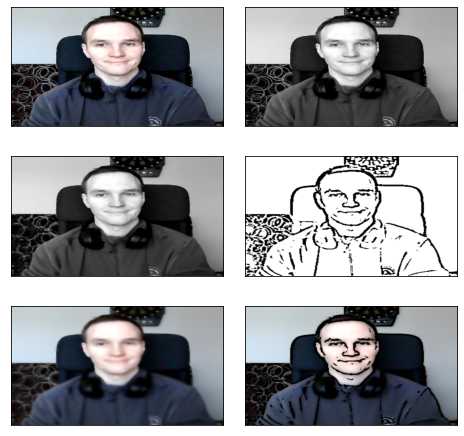

In [21]:
image = 'j_photo' #your image name
extension = 'png'#file extension
ImagePath= '{0}.{1}'.format(image, extension)
cartoonify(ImagePath)